<a href="https://colab.research.google.com/github/jdy5294/All_Deep_Learning/blob/main/Code/CH14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14장 모델의 성능 향상시키기

### 1. 데이터의 확인과 검증셋

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv', header=None)

df.describe()

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Receiving objects: 100% (21/21), 460.95 KiB | 1.80 MiB/s, done.
Resolving deltas: 100% (3/3), done.


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [8]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # validation: 0.8 x 0.25 = 0.2

score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

Epoch 1/50
8/8 [==============================] - 2s 33ms/step - loss: 0.9088 - accuracy: 0.5643 - val_loss: 0.6213 - val_accuracy: 0.7662
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6487 - accuracy: 0.7534 - val_loss: 0.6474 - val_accuracy: 0.7662
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5906 - accuracy: 0.7534 - val_loss: 0.5084 - val_accuracy: 0.7662
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4518 - accuracy: 0.7539 - val_loss: 0.3858 - val_accuracy: 0.7769
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3840 - accuracy: 0.7986 - val_loss: 0.3445 - val_accuracy: 0.8562
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3245 - accuracy: 0.8653 - val_loss: 0.2767 - val_accuracy: 0.8969
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2767 - accuracy: 0.9015 - val_loss: 0.2474 - val_accuracy: 0.9185
Epoch 8/50
8/8 [=================

## 2. 모델 업데이트하기

### 기본 코드 불러오기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd

# !git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv', header=None)

X = df.iloc[:,0:12]
y = df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 모델의 저장 설정 및 실행

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.9592.hdf5

Epoch 2: saving model to ./data/model/all/02-0.9577.hdf5

Epoch 3: saving model to ./data/model/all/03-0.9569.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to ./data/model/all/04-0.9631.hdf5

Epoch 5: saving model to ./data/model/all/05-0.9600.hdf5

Epoch 6: saving model to ./data/model/all/06-0.9577.hdf5

Epoch 7: saving model to ./data/model/all/07-0.9638.hdf5

Epoch 8: saving model to ./data/model/all/08-0.9646.hdf5

Epoch 9: saving model to ./data/model/all/09-0.9623.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9600.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9631.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9615.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9669.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9654.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9600.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9677.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9692.hdf5

Epoch 18: saving model to ./data/model/all/18-0.9592.hdf5

Epoch 19: saving model to ./data/model/all/19-0.9669.hdf5

Epoch 20: saving model to ./data/model/all/20-0.9700.hdf5

Ep

In [11]:
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9777
Test accuracy: 0.9776923060417175


## 3. 그래프로 과적합 확인하기

In [12]:
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=0)

hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.093117,0.972030,0.091437,0.976154
1,0.094890,0.971517,0.088811,0.973846
2,0.092263,0.974083,0.088577,0.973846
3,0.091633,0.973826,0.087375,0.973846
4,0.090611,0.973056,0.097003,0.972308
...,...,...,...,...
1995,0.028800,0.991532,0.073753,0.985385
1996,0.030234,0.993585,0.071507,0.984615
1997,0.018739,0.995381,0.066055,0.985385
1998,0.019007,0.995638,0.066724,0.986923


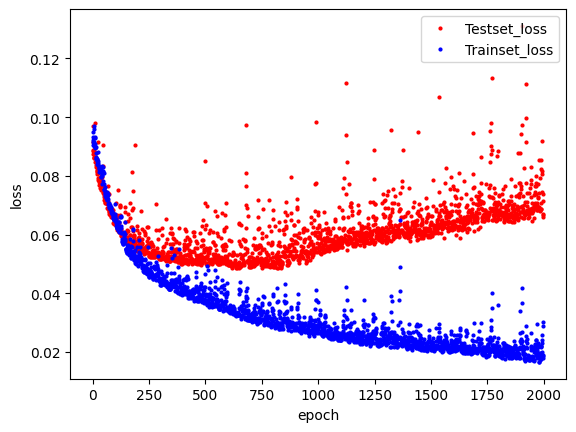

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt

y_vloss=hist_df['val_loss']
y_loss=hist_df['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 4. 학습의 자동 중단

### 기본 코드 불러오기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import os
import pandas as pd

# !git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv', header=None)

X = df.iloc[:,0:12]
y = df.iloc[:,12]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_9 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


### 학습의 자동 중단 및 최적화 모델 저장

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
# monitor: model.fit()의 결과 중 어떤 것을 이용할지 결정
# patience: 지정된 값이 몇 번 이상 향상되지 않으면 학습을 종료시킬지 결정

modelpath="./data/model/Ch14-4-bestmodel-{epoch:02d}.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True) # 최고의 모델 하나만 저장

history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.0188 - accuracy: 0.9959 - val_loss: 0.0704 - val_accuracy: 0.9869
Epoch 2/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0184 - accuracy: 0.9949 - val_loss: 0.0713 - val_accuracy: 0.9862
Epoch 3/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0196 - accuracy: 0.9959 - val_loss: 0.0732 - val_accuracy: 0.9862
Epoch 4/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0084 - accuracy: 0.9980

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 8ms/step - loss: 0.0214 - accuracy: 0.9944 - val_loss: 0.0712 - val_accuracy: 0.9877
Epoch 5/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.0180 - accuracy: 0.9956 - val_loss: 0.0675 - val_accuracy: 0.9877
Epoch 6/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0174 - accuracy: 0.9959 - val_loss: 0.0661 - val_accuracy: 0.9877
Epoch 7/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0194 - accuracy: 0.9944 - val_loss: 0.0729 - val_accuracy: 0.9838
Epoch 8/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0178 - accuracy: 0.9949 - val_loss: 0.0689 - val_accuracy: 0.9869
Epoch 9/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0185 - accuracy: 0.9946 - val_loss: 0.0704 - val_accuracy: 0.9877
Epoch 10/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.0179 - accuracy: 0.9949 - val_loss: 0.0711 - val_accuracy: 0.9846
Epoch 11/2000
8/8 [===========

In [17]:
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9846
Test accuracy: 0.9846153855323792
